In [1]:
import pandas as pd
import pandas_profiling
import sklearn
import modelHandler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from imblearn.over_sampling import KMeansSMOTE, SMOTE, SVMSMOTE
import numpy as np

In [2]:
df_train = pd.read_csv('../Data/train.csv', index_col = 0)
df_test = pd.read_csv('../Data/test_x.csv', index_col = 0)

In [6]:
pr_train = df_train.profile_report()

Profile report saved as html as github does not allow its visualization

In [7]:
pr_train.to_file('Data_train_profileReport.html') 

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 84.27it/s]


Profile on test data to check if the variables are similar to the train data 

In [8]:
pr_test = df_test.profile_report()

Profile report saved as html as github does not allow its visualization

In [9]:
pr_test.to_file("Data_test_profileReport.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 52.53it/s]


The EDA is done based on the profile report results. You can see them on the html files. With the profile report I can see all the relevant information of the data atributes and its correlations

## Visual exploration

In [6]:
cols_train = ['Hour', 'Sensor_beta', 'Sensor_gamma',
       'Sensor_alpha_plus'] #Atributes with top correlation

target_train = ['Insect']

x_train = df_train[cols_train].to_numpy()
y_train = df_train[target_train].to_numpy().ravel()

x_test = df_test[cols_train].to_numpy() 

In [7]:
X = sklearn.preprocessing.StandardScaler().fit_transform(x_train)

### 2 Components summarized data

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['target'] = y_train
principalDf.head()

,principal component 1,principal component 2,target
0,0.215339,-2.317970,2
1,2.404599,-0.209929,0
2,-0.070083,0.111812,1
3,-0.284399,-0.812552,0
4,0.404090,-0.923771,2


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

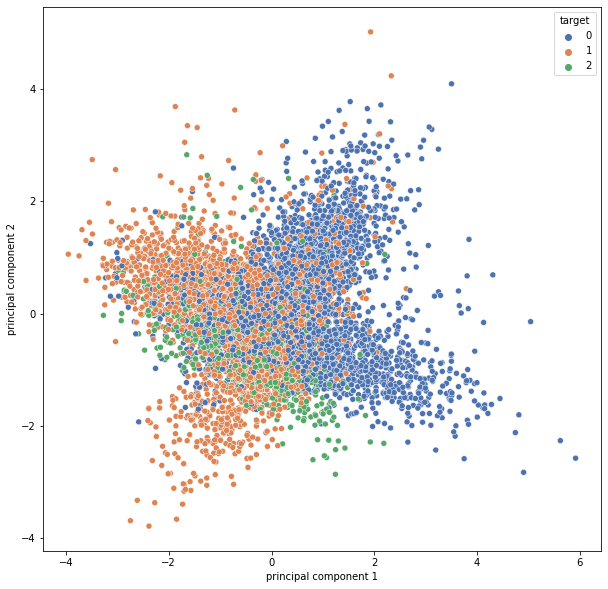

In [9]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(x = principalDf['principal component 1'], y = principalDf['principal component 2'], hue = principalDf['target'],  palette="deep")

### 3 Components summarized data

In [10]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [11]:
principalDf['target'] = y_train

In [12]:
principalDf.head()

,principal component 1,principal component 2,principal component 3,target
0,0.215339,-2.317970,0.371464,2
1,2.404599,-0.209929,2.711542,0
2,-0.070083,0.111812,-0.522431,1
3,-0.284399,-0.812552,-0.013824,0
4,0.404090,-0.923771,0.883229,2


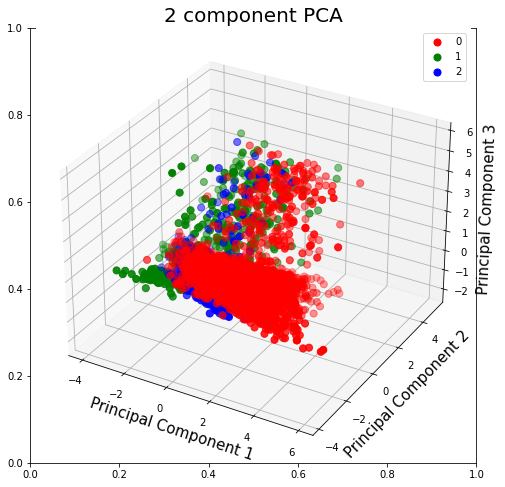

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2'],
               principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
fig = px.scatter_3d(principalDf, x='principal component 1', y='principal component 2', z='principal component 3',
              color='target')
fig.show()